In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import date

sys.path.append('../')

from engine.StockTradeDataEngine import StockTradeDataEngine
from util.chart_methods import draw_line_chart_with_moving_average
from util.chart_methods import draw_time_series_with_mean_and_std

In [2]:
data_engine = StockTradeDataEngine()

In [43]:
df = data_engine.get_trade_data_by_code('600519.SH', date(2020, 1, 20), date(2023, 1, 31))

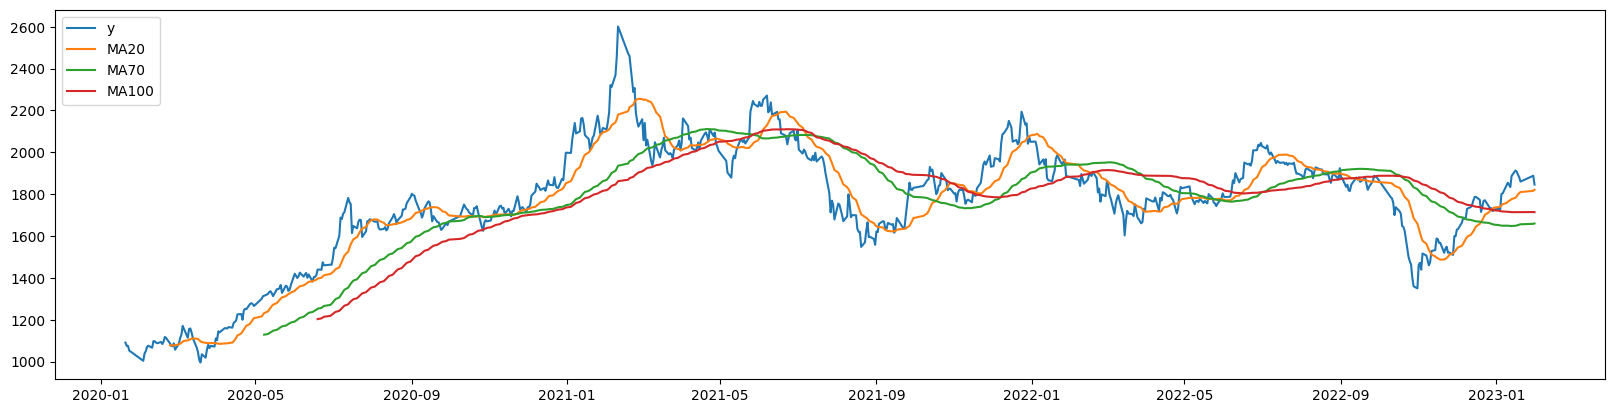

In [44]:
draw_line_chart_with_moving_average(x_series=df.trade_date, y_series=df.close, sma_days_list=[20,70,100])

In [5]:
y_series = pd.Series(df.pct_chg)
x_series = pd.Series(df.trade_date)

In [6]:
desc = y_series.describe()
desc

count    730.000000
mean       0.097753
std        2.042086
min       -7.900000
25%       -1.007500
50%        0.005000
75%        1.320000
max        9.500000
Name: pct_chg, dtype: float64

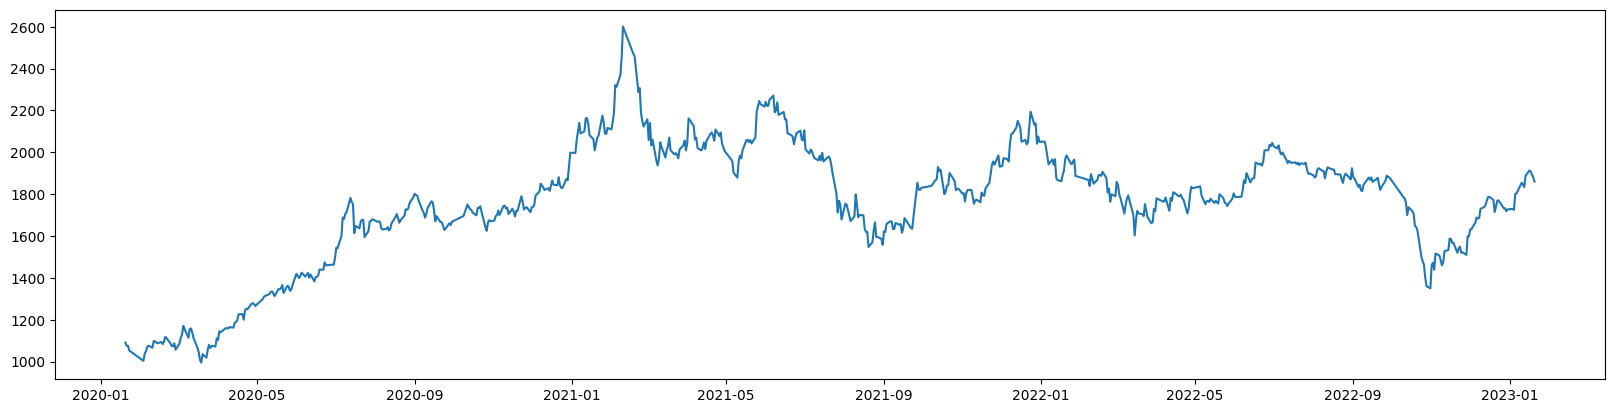

In [7]:
f = plt.figure()
f.set_figwidth(20)
plt.plot(x_series, pd.Series(df.close))
plt.show()

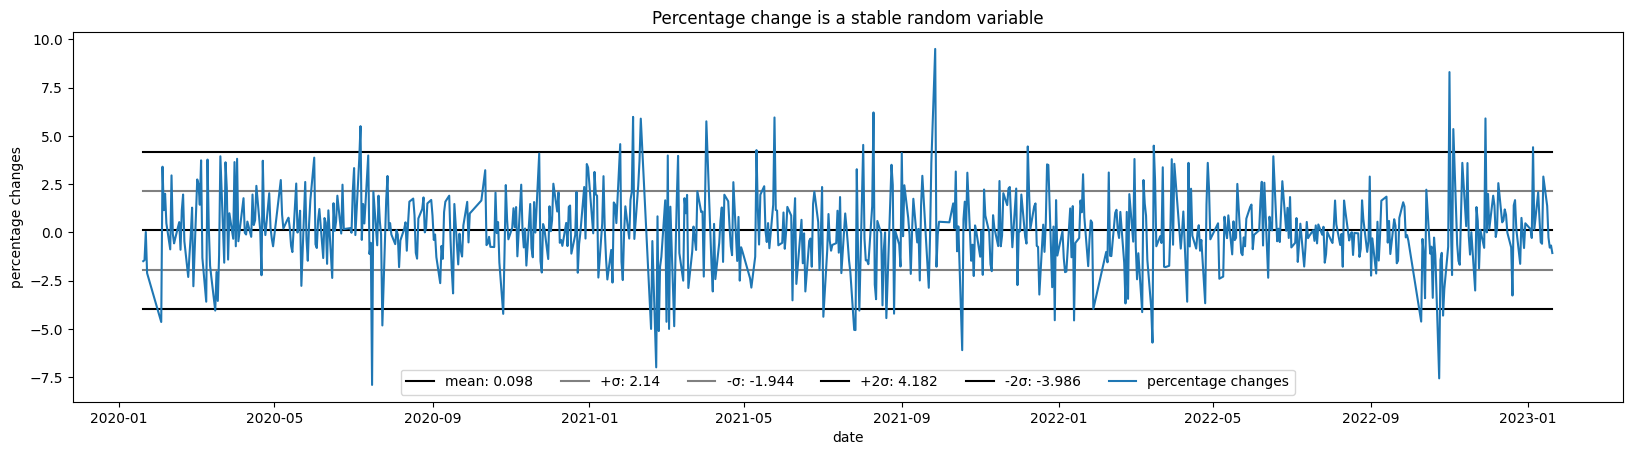

In [8]:
draw_time_series_with_mean_and_std(x_series, y_series, title='Percentage change is a stable random variable', xlabel='date', ylabel='percentage changes')